<a href="https://colab.research.google.com/github/qmcnn/Data-Mining/blob/main/pivot_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

| Variable   |      Definition      |      Key                    |
|------------|:--------------------:|----------------------------:|
| survival   |  Survival            | 0 = No, 1 = Yes             |
| pclass    |    Ticket class      |   1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | sex |     |
| age | age |  in years   |
| sibsp | # of siblings / spouses aboard the Titanic |     |
| parch | # of parents / children aboard the Titanic |     |
| ticket | Ticket number |     |
| fare | Passenger fare |     |
| cabin | Cabin number |     |
| embarked | Port of Embarkation |   C = Cherbourg, Q = Queenstown, S = Southampton   |

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Year4/Data Mining/titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
df.info()#ดูcal,type,index,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [8]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [47]:
df[['sex']]

,sex
0,female
1,male
2,female
3,male
4,female
...,...
1305,female
1306,male
1307,male
1308,male


In [46]:
df['sex']

0       female
1         male
2       female
3         male
4       female
         ...  
1305    female
1306      male
1307      male
1308      male
1309       NaN
Name: sex, Length: 1310, dtype: object

In [44]:
df[['sex']].describe()

,sex
count,1309
unique,2
top,male
freq,843


In [10]:
df["sex"].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [11]:
# drop some features
df.drop(['ticket','name'],inplace=True,axis=1)

In [12]:
df.shape

(1310, 12)

In [13]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Group data using index in a pivot table
* `pivot_table` requires a data and an index parameter
* `data` is the Pandas dataframe you pass to the function
* `index` is the feature that allows you to group your data. The index feature will appear as an index in the resultant table

#### Single Index

In [14]:
table = pd.pivot_table(data=df,index=['sex'])
table

<ipython-input-14-f55fdedc6cac>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  table = pd.pivot_table(data=df,index=['sex'])


,age,body,fare,parch,pclass,sibsp,survived
sex,,,,,,,
female,28.687071,166.62500,46.198097,0.633047,2.154506,0.652361,0.727468
male,30.585233,160.39823,26.154601,0.247924,2.372479,0.413998,0.190985


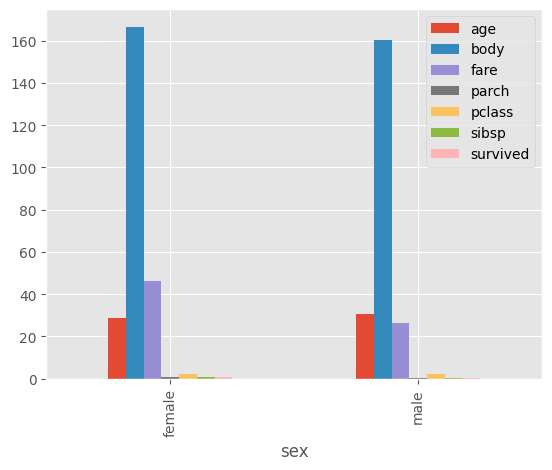

In [15]:
table.plot(kind = 'bar')
plt.show()

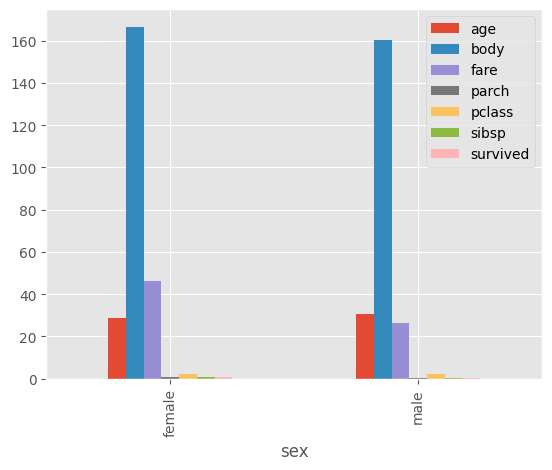

In [16]:
table.plot.bar()
plt.show()

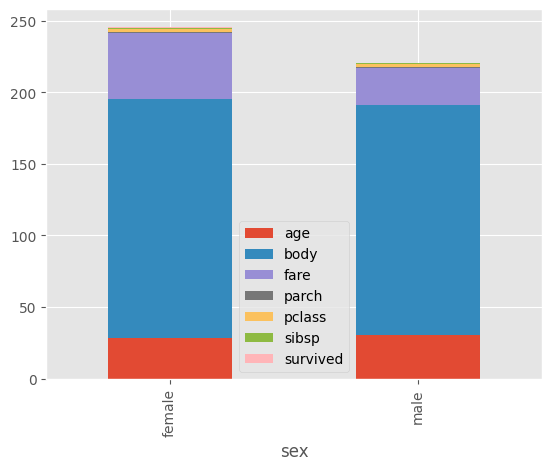

In [17]:
table.plot.bar(stacked=True)
plt.show()

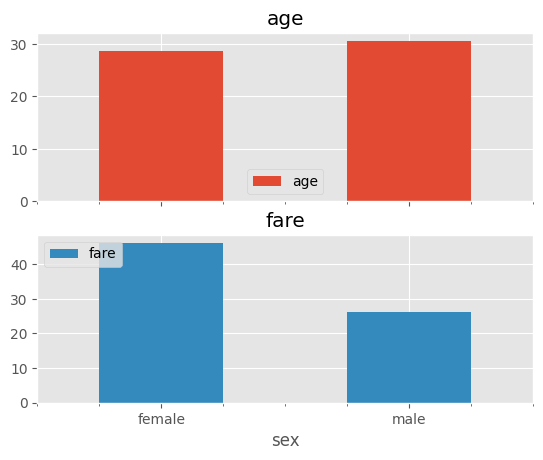

In [18]:
axes = table[['age','fare']].plot.bar(rot=0, subplots=True)
axes[1].legend(loc=2)

#### Multiple Index

In [19]:
table = pd.pivot_table(df,index=['sex','pclass'])
table

<ipython-input-19-880de11e13a3>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  table = pd.pivot_table(df,index=['sex','pclass'])


age        body        fare     parch     sibsp  survived
sex    pclass                                                                 
female 1.0     37.037594         NaN  109.412385  0.472222  0.555556  0.965278
       2.0     27.499191   52.000000   23.234827  0.650943  0.500000  0.886792
       3.0     22.185307  183.000000   15.324250  0.731481  0.791667  0.490741
male   1.0     41.029250  162.828571   69.888385  0.279330  0.340782  0.340782
       2.0     30.815401  171.233333   19.904946  0.192982  0.327485  0.146199
       3.0     25.962273  151.854167   12.415462  0.255578  0.470588  0.152130

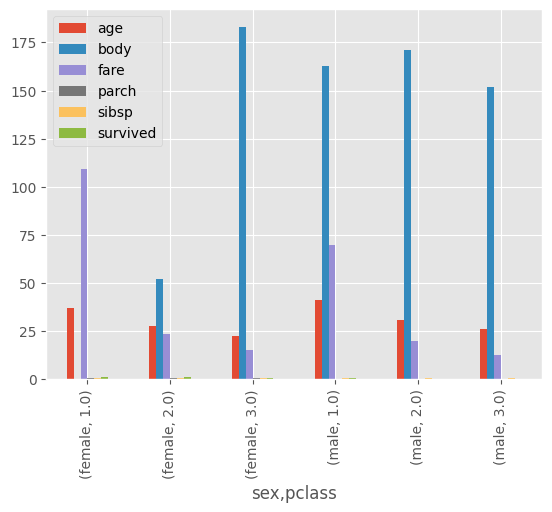

In [20]:
table.plot(kind = 'bar')
plt.show()

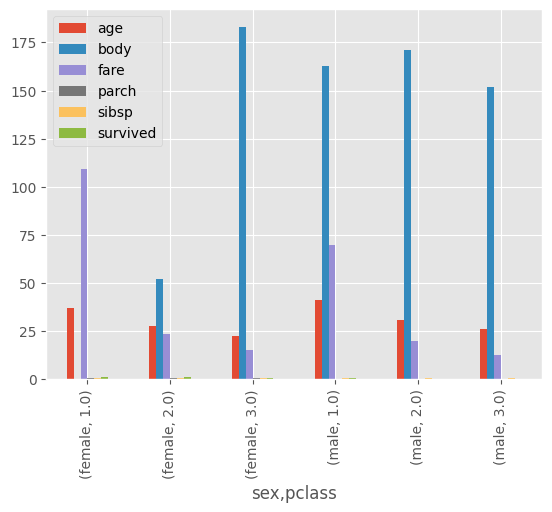

In [21]:
table.plot.bar()
plt.show()

In [22]:
df[['survived']]

,survived
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
1305,0.0
1306,0.0
1307,0.0
1308,0.0


In [48]:
table = pd.pivot_table(df,index=['sex','pclass'],values=['survived'],aggfunc="count")
table

survived
sex    pclass          
female 1.0          144
       2.0          106
       3.0          216
male   1.0          179
       2.0          171
       3.0          493

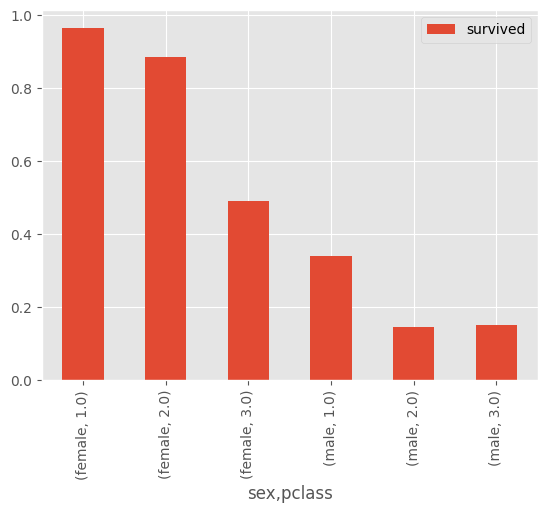

In [24]:
table.plot.bar()
plt.show()

In [50]:
df.groupby(['sex'])['survived'].mean()

sex
female    0.727468
male      0.190985
Name: survived, dtype: float64

In [51]:
df.groupby(['sex'])[['survived']].mean()

,survived
sex,
female,0.727468
male,0.190985


In [25]:
df.groupby(['sex']).size()#รวมกลุ่มข้อมูล แบ่งกลุ่มข้อมูล ญ,ช

sex
female    466
male      843
dtype: int64

In [26]:
df.groupby(['sex'])[['sex']].agg('count')

,sex
sex,
female,466
male,843


In [27]:
df.groupby(['sex'])[['pclass']].count()

,pclass
sex,
female,466
male,843


array([<Axes: >], dtype=object)

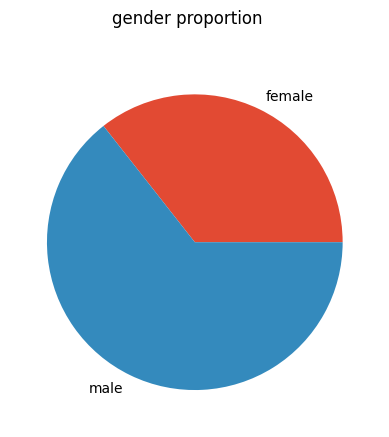

In [28]:
df.groupby(['sex'])[['pclass']].count().plot.pie(subplots=True, ylabel="", legend="", title="gender proportion")

In [29]:
df.groupby(['sex','pclass']).size() \
   .sort_values(ascending=False) \
   .reset_index(name='count') \
   .drop_duplicates(subset='sex')#

,sex,pclass,count
0,male,3.0,493
1,female,3.0,216


<Axes: ylabel='Frequency'>

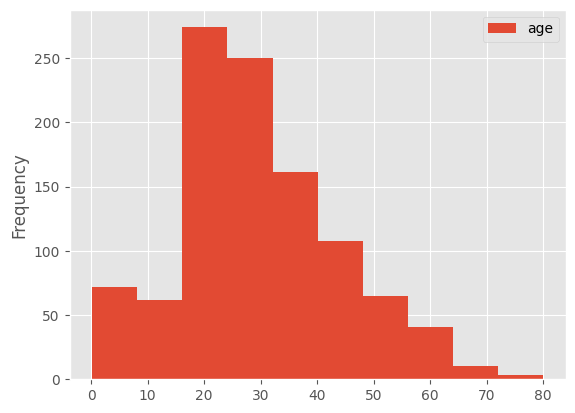

In [30]:
df[['age']].plot.hist()

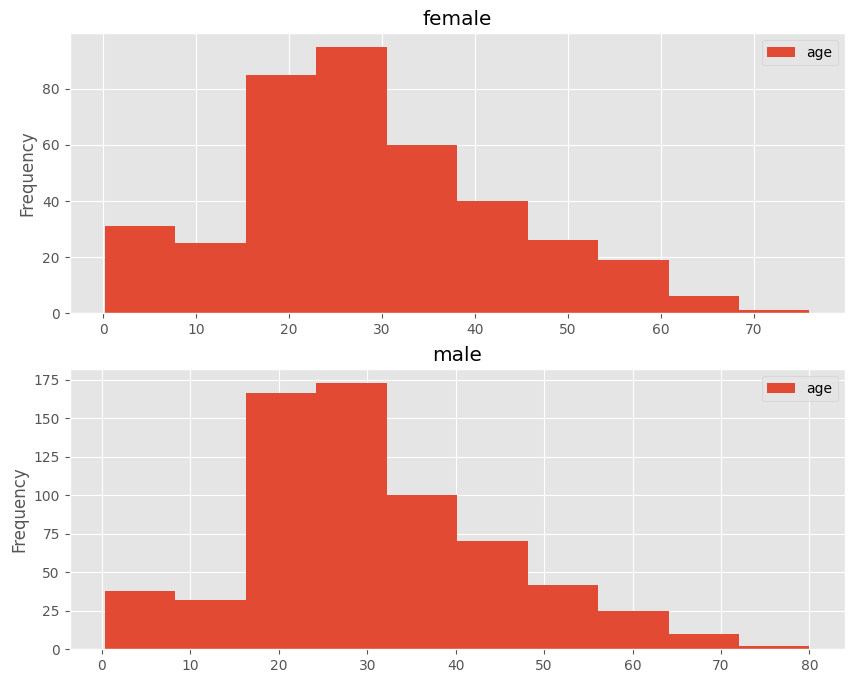

In [31]:
ax = df.plot.hist(column=["age"], by="sex", figsize=(10, 8))

In [32]:
df[['age']][df['sex']=='female']

,age
0,29.0
2,2.0
4,25.0
6,63.0
8,53.0
...,...
1286,38.0
1290,47.0
1300,15.0
1304,14.5


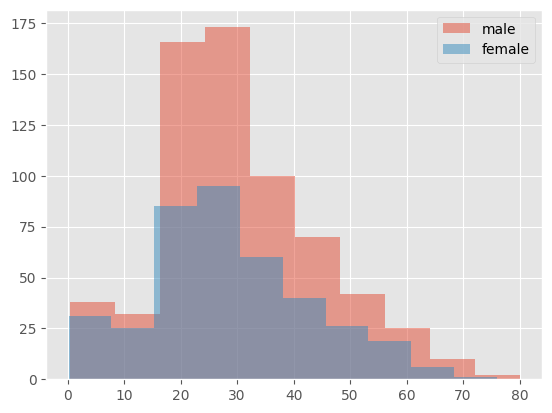

In [34]:
df['age'][df['sex']=='male'].hist(label="male", alpha=0.5)
df['age'][df['sex']=='female'].hist(label="female", alpha=0.5)
plt.legend(loc='upper right')

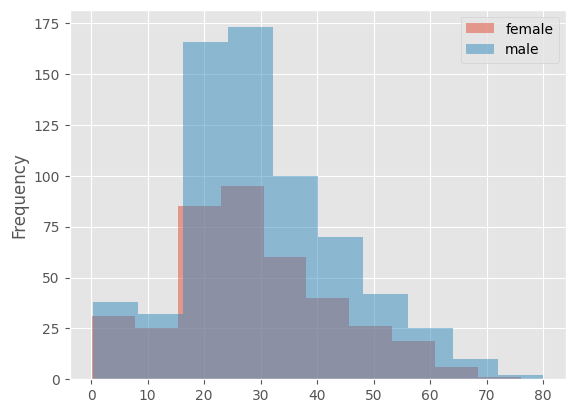

In [33]:
df.groupby('sex')['age'].plot.hist(alpha=0.5)
plt.legend()

#### Aggregate Functions

`aggfunc` is an aggregate function that pivot_table applies to your grouped data. By default, it is `np.mean()`,

In [35]:
table = pd.pivot_table(df,index=['sex','pclass'], aggfunc={'age':np.mean,'survived':np.sum})
table

age  survived
sex    pclass                     
female 1.0     37.037594     139.0
       2.0     27.499191      94.0
       3.0     22.185307     106.0
male   1.0     41.029250      61.0
       2.0     30.815401      25.0
       3.0     25.962273      75.0

`value` parameter is where you tell the function which features to aggregate on. It is an optional field and if you don’t specify this value, then the function will aggregate on all the numerical features of the dataset

In [36]:
table = pd.pivot_table(df,index=['sex','pclass'],values=['survived'], aggfunc=np.mean)
table

survived
sex    pclass          
female 1.0     0.965278
       2.0     0.886792
       3.0     0.490741
male   1.0     0.340782
       2.0     0.146199
       3.0     0.152130

<Axes: xlabel='sex,pclass'>

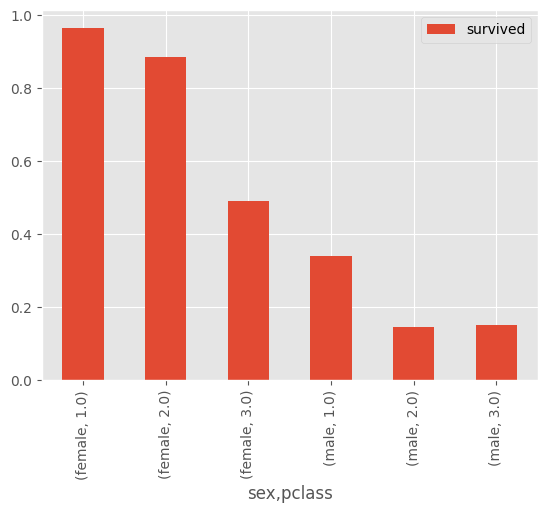

In [37]:
table.plot(kind='bar')

<Axes: ylabel='sex,pclass'>

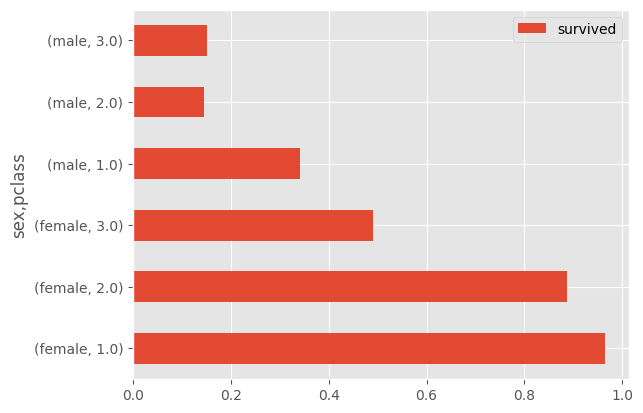

In [38]:
table.plot(kind='barh')

`columns` is optional and displays the values horizontally on the top of the resultant table

In [39]:
table = pd.pivot_table(df,index=['sex'],columns=['pclass'],values=['survived'],aggfunc=np.sum)
table

survived             
pclass      1.0   2.0    3.0
sex                         
female    139.0  94.0  106.0
male       61.0  25.0   75.0

<Axes: xlabel='sex'>

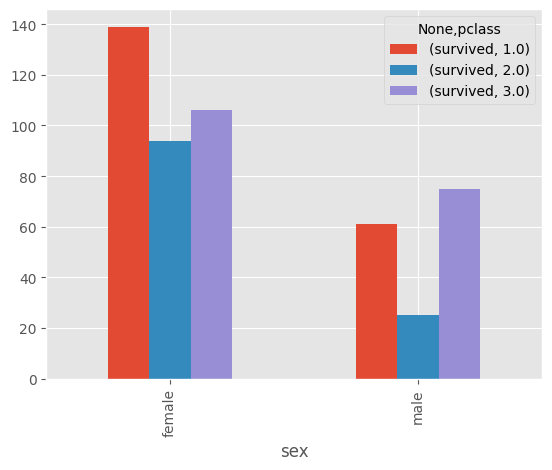

In [40]:
table.plot(kind='bar')

<Axes: xlabel='sex'>

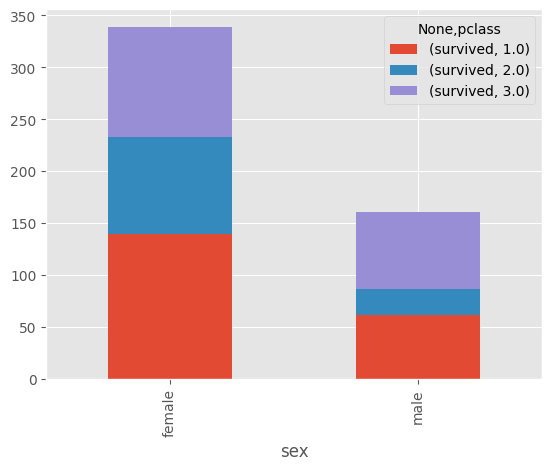

In [41]:
table.plot(kind='bar',stacked=True)

#### handling missing values

In [42]:
#display null values
table = pd.pivot_table(df,index=['sex','survived','pclass'],
                       columns=['embarked'],
                       values=['age'],
                       aggfunc=np.mean)
table

age                      
embarked                        C          Q          S
sex    survived pclass                                 
female 0.0      1.0     43.000000        NaN  30.000000
                2.0           NaN        NaN  34.090909
                3.0     20.700000  26.692308  22.951613
       1.0      1.0     37.952381  35.000000  35.885246
                2.0     19.363636  30.000000  27.680209
                3.0     15.676471  20.500000  22.726951
male   0.0      1.0     43.216216  44.000000  43.925000
                2.0     30.500000  53.750000  32.606557
                3.0     25.722222  26.921053  26.766735
       1.0      1.0     35.538462        NaN  36.774693
                2.0     20.000000        NaN  16.912279
                3.0     20.219700  25.000000  22.855072

`dropna` allows you to drop the null values in the grouped table whose all values are null

`fill_value` parameter can be used to replace the NaN values in the grouped table with the values that you provide here

In [43]:
table = pd.pivot_table(df,index=['sex','survived','pclass'],
                       columns=['embarked'],
                       values=['age'],
                       aggfunc=np.mean,
                       fill_value=np.mean(df['age']))
table

age                      
embarked                        C          Q          S
sex    survived pclass                                 
female 0.0      1.0     43.000000  29.881135  30.000000
                2.0     29.881135  29.881135  34.090909
                3.0     20.700000  26.692308  22.951613
       1.0      1.0     37.952381  35.000000  35.885246
                2.0     19.363636  30.000000  27.680209
                3.0     15.676471  20.500000  22.726951
male   0.0      1.0     43.216216  44.000000  43.925000
                2.0     30.500000  53.750000  32.606557
                3.0     25.722222  26.921053  26.766735
       1.0      1.0     35.538462  29.881135  36.774693
                2.0     20.000000  29.881135  16.912279
                3.0     20.219700  25.000000  22.855072